In [1]:
import mkl
mkl.set_dynamic(0)

8

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


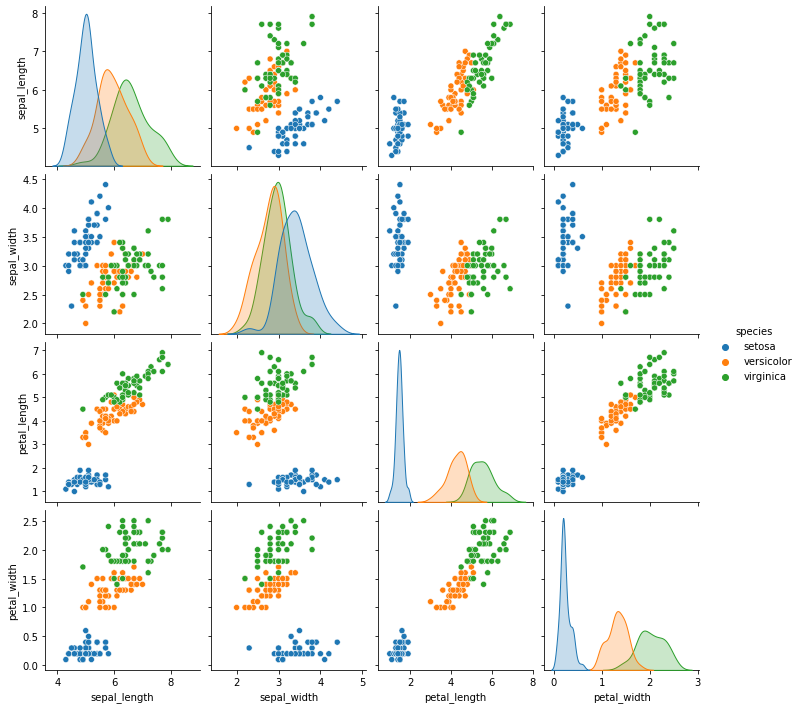

In [6]:
sns.pairplot(df, hue='species')

In [7]:
X = df.drop('species', axis=1)

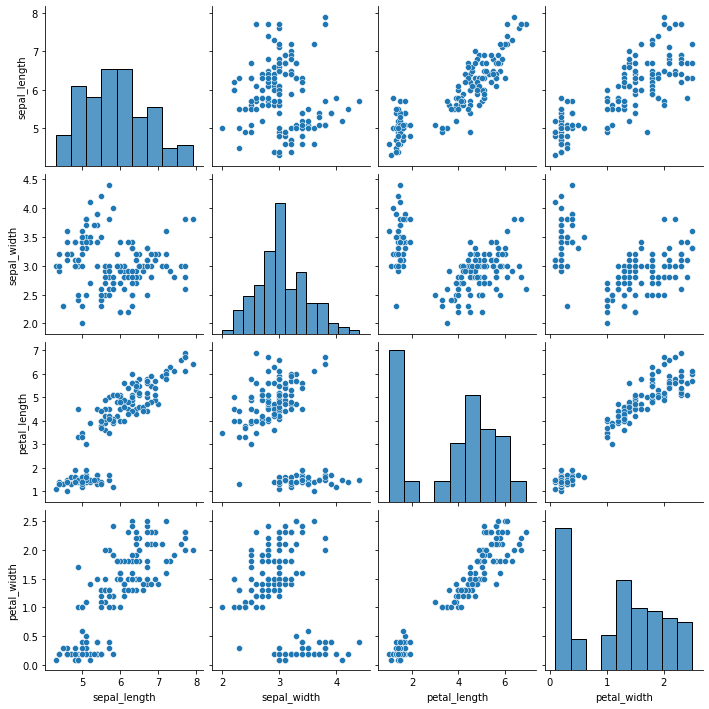

In [8]:
sns.pairplot(X)

In [9]:
from pyclustertend import hopkins

In [10]:
X.shape[0]

150

In [11]:
hopkins(X, 150)

0.1631111559429292

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

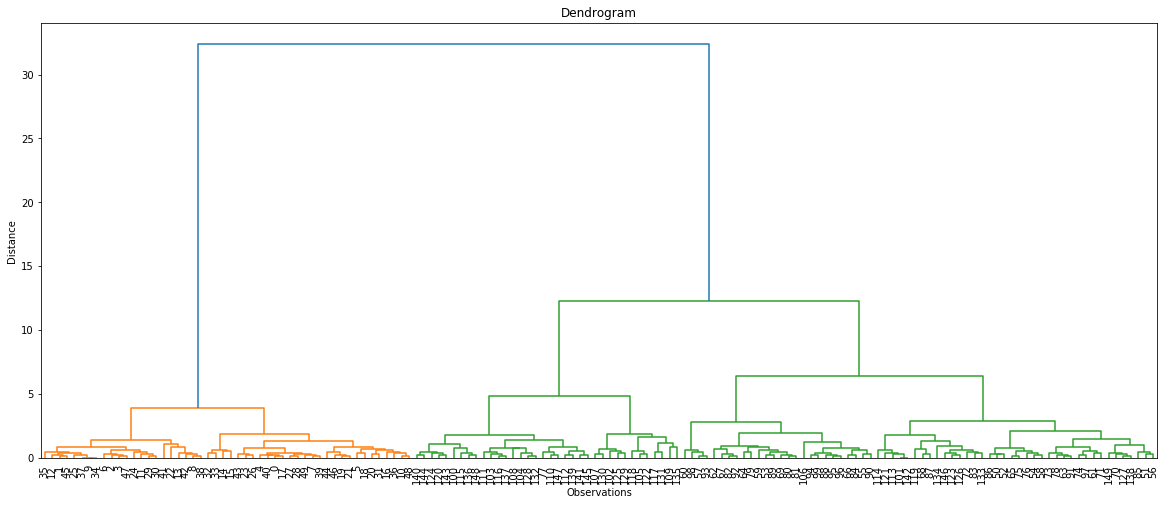

In [14]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

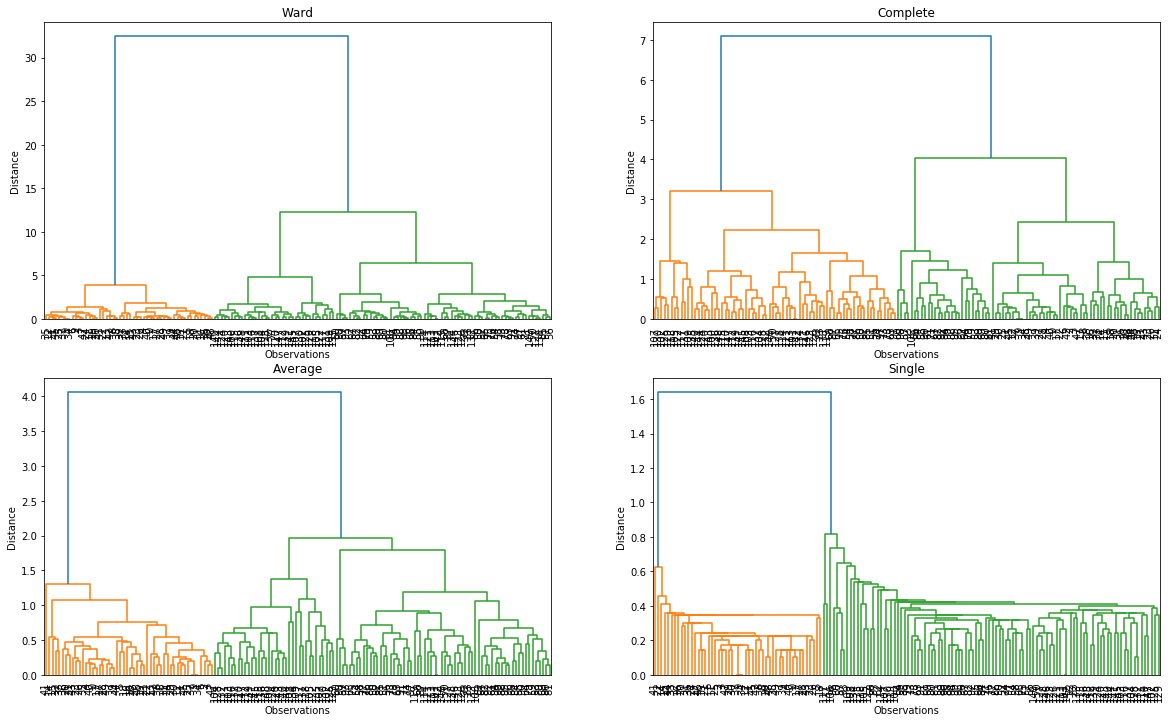

In [15]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.6863930543445408
Silhouette Score for 3 clusters: 0.5540972908150553
Silhouette Score for 4 clusters: 0.4887398491004218
Silhouette Score for 5 clusters: 0.4841553526240122
Silhouette Score for 6 clusters: 0.3618845152256815
Silhouette Score for 7 clusters: 0.34485408962742325
Silhouette Score for 8 clusters: 0.3462405312208591
Silhouette Score for 9 clusters: 0.33313850659637134


In [19]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


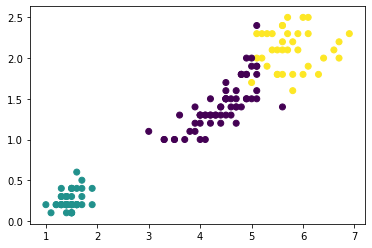

In [21]:
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = model1.labels_, cmap = "viridis")

In [25]:
clusters = model1.labels_

In [26]:
df["predicted_clusters"] = clusters

In [27]:
ct = pd.crosstab(df["predicted_clusters"], df["species"])
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [28]:
map_dict = {"virginica":2,
            "setosa":1,
            "versicolor": 0}

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [30]:
df["original_classes"]= df.species.map(map_dict)

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


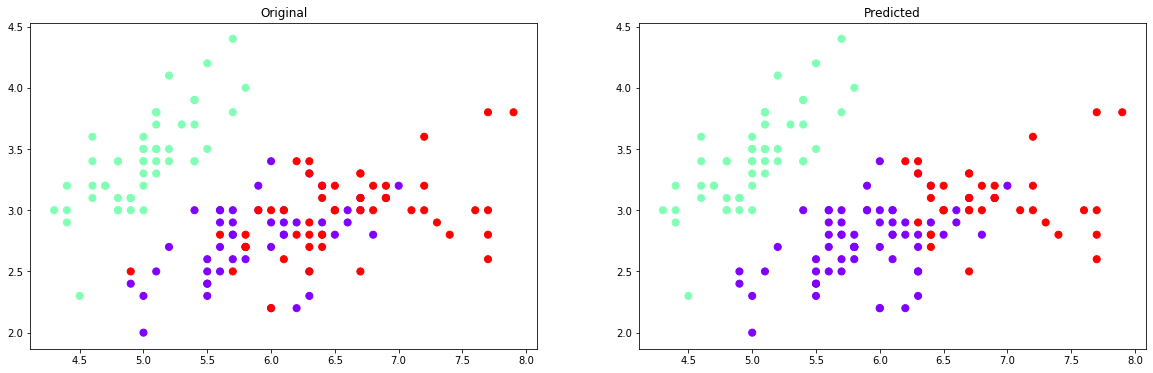

In [32]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow");

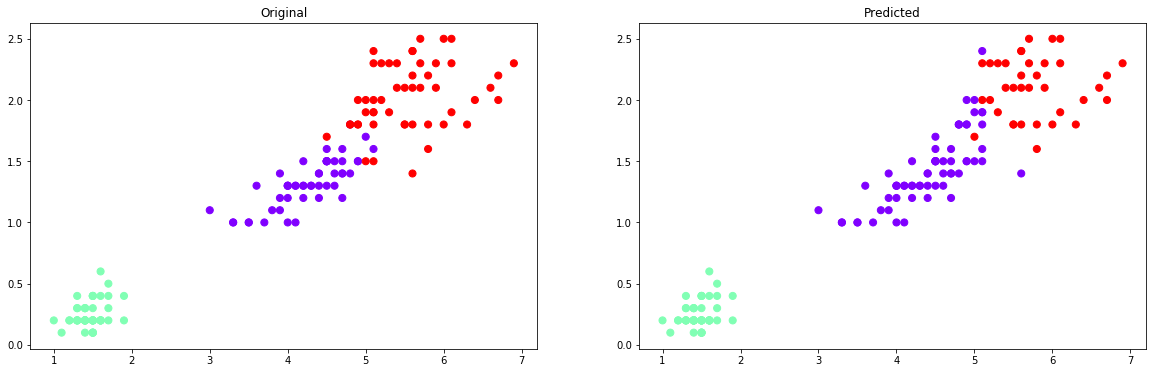

In [33]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = df.original_classes, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = df.predicted_clusters, s = 50, cmap = "rainbow");

In [34]:
from sklearn.metrics.cluster import adjusted_rand_score

In [35]:
adjusted_rand_score(df['species'], df['predicted_clusters'])

0.7311985567707746

In [36]:
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [37]:
df['predicted_clusters']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: predicted_clusters, Length: 150, dtype: int64

In [38]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,5.920313,5.006,6.869444
sepal_width,2.751563,3.418,3.086111
petal_length,4.420313,1.464,5.769444
petal_width,1.434375,0.244,2.105556


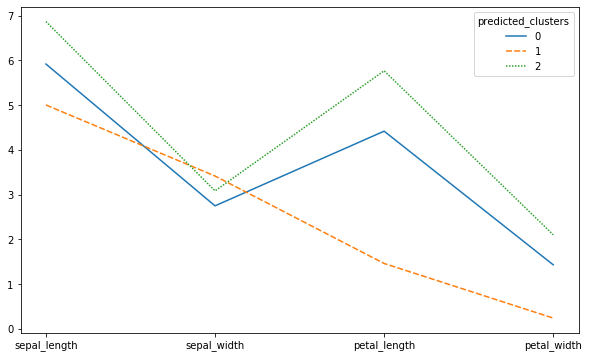

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = clus_pred);

In [41]:
Z = df.iloc[:, [2,3]]
Z

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [42]:
hopkins(Z, Z.shape[0])

0.10617940433940946

In [43]:
hc_ward = linkage(y = Z, method = "ward")
hc_complete = linkage(Z, "complete")
hc_average = linkage(Z, "average")
hc_single = linkage(Z, "single")

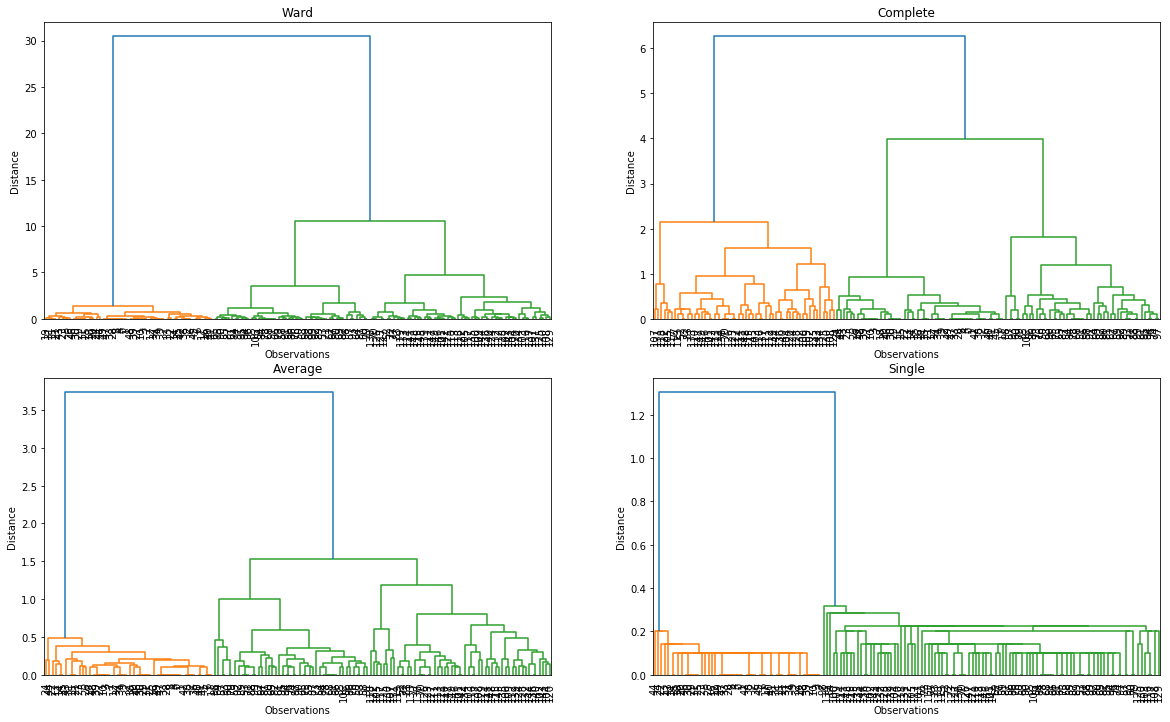

In [44]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [45]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(Z)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(Z, model.labels_)}')

Silhouette Score for 2 clusters: 0.7667234280554557
Silhouette Score for 3 clusters: 0.6571856448729174
Silhouette Score for 4 clusters: 0.5893247167081789
Silhouette Score for 5 clusters: 0.57795322338552
Silhouette Score for 6 clusters: 0.5744995921566008
Silhouette Score for 7 clusters: 0.582843311312708
Silhouette Score for 8 clusters: 0.5676106719982476
Silhouette Score for 9 clusters: 0.5467111936909043


In [46]:
model2 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model2.fit_predict(Z)

In [47]:
Z["species"] = df["species"]
Z["predicted_clusters"] = clusters
Z

/opt/miniconda3/envs/intelml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/envs/intelml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1
...,...,...,...,...
145,5.2,2.3,virginica,0
146,5.0,1.9,virginica,0
147,5.2,2.0,virginica,0
148,5.4,2.3,virginica,0


In [48]:
Z_ct = pd.crosstab(Z["predicted_clusters"], Z["species"])
Z_ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,50,0,0
2,0,45,1


In [53]:
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [49]:
map_dict = {"virginica":0,
            "setosa":1,
            "versicolor": 2}

In [50]:
Z["original_classes"]= Z.species.map(map_dict)
Z

/opt/miniconda3/envs/intelml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,petal_length,petal_width,species,predicted_clusters,original_classes
0,1.4,0.2,setosa,1,1
1,1.4,0.2,setosa,1,1
2,1.3,0.2,setosa,1,1
3,1.5,0.2,setosa,1,1
4,1.4,0.2,setosa,1,1
...,...,...,...,...,...
145,5.2,2.3,virginica,0,0
146,5.0,1.9,virginica,0,0
147,5.2,2.0,virginica,0,0
148,5.4,2.3,virginica,0,0


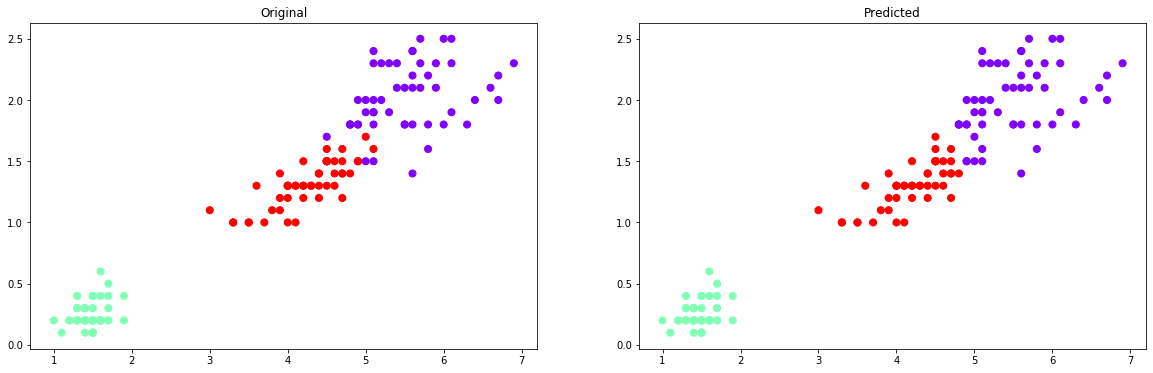

In [51]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(Z.iloc[:,0], Z.iloc[:,1], c = Z.original_classes, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(Z.iloc[:,0], Z.iloc[:,1], c = Z.predicted_clusters, s = 50, cmap = "rainbow");

In [52]:
adjusted_rand_score(Z['species'], Z['predicted_clusters'])

0.8857921001989628